In [3]:
pip install pytrends

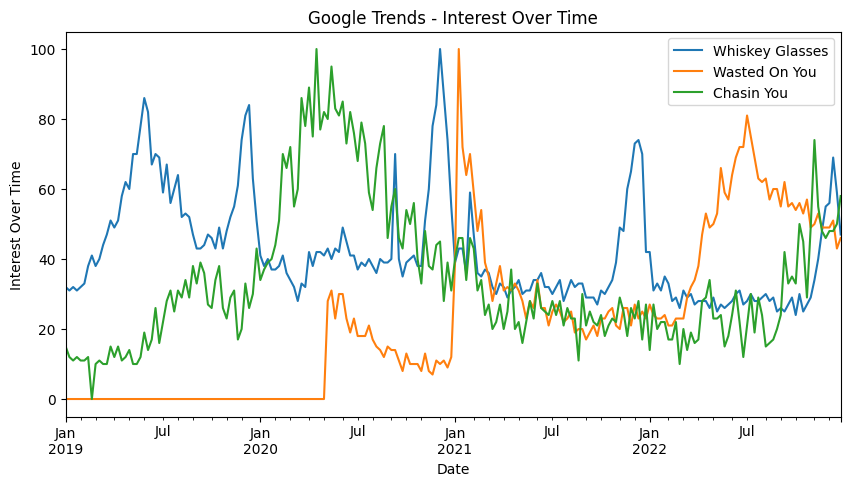

In [12]:
import requests
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import time
import re
big_data = []
# used headers to gain access to pytrends (google trends)
requests_args = {
    'headers': {
 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'

    }
}
# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(requests_args=requests_args)


# Build payload for the Google Trends query
music_list = ['Whiskey Glasses', 'Wasted On You', 'Chasin You']
plt.figure(figsize=(10, 5))

for music in music_list:
    try:
        cleaned_music_name = re.sub(r'[^\w\s]', '', music)
        pytrend.build_payload(kw_list=[music], cat=0, timeframe='2019-01-01 2022-12-31', gprop='')
        df = pytrend.interest_over_time()

        dates = df.index
        big_data.append(df)
        # Plot the data using the cleaned music name
        df[cleaned_music_name].plot(label=cleaned_music_name)



        # Introduce a delay between requests
        time.sleep(5)

    except Exception as e:
        print(f"Error for {music}: {e}")

plt.title('Google Trends - Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.legend()
plt.show()


In [16]:

aaa= big_data[0].merge(big_data[1], on='date', how='outer').merge(big_data[2], on='date', how='outer')
#aaa.to_csv('Morgan_Wallend_songs_google trend.csv',index = False)

In [ ]:
import os
import pandas as pd
file_path = '/Users/suleiwang/Desktop/Davis/STA 141B/Spotify weekly charts  csvs '

directory = file_path

dfs = []
date = '2022-01-06'

# Iterate through files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(directory, filename))

        date_components = filename.split('.')[0].split('-')[-3:]
        year, month, day = date_components

        df['WeekDate'] = pd.to_datetime(f'{year}-{month}-{day}', format='%Y-%m-%d')

        dfs.append(df)

result_df = pd.concat(dfs, ignore_index=True)

# select the newest date to gain the music list
df_sorted = result_df.sort_values(by='WeekDate')
df_sorted['WeekDate'] = pd.to_datetime(df_sorted['WeekDate'])

# gain the info for the newest date
new_df = df_sorted[df_sorted['WeekDate'] == date]
new_df = new_df.sort_values(by = 'streams', ascending=False)
pop_music = new_df.head(15)

pop_music_name = pop_music['track_name'].values
pop_music

<DatetimeArray>
['2022-04-07 00:00:00', '2023-05-18 00:00:00', '2021-03-04 00:00:00',
 '2022-06-16 00:00:00', '2022-06-02 00:00:00', '2021-08-19 00:00:00',
 '2023-10-05 00:00:00', '2021-11-04 00:00:00', '2021-11-11 00:00:00',
 '2021-01-28 00:00:00',
 ...
 '2021-04-01 00:00:00', '2021-04-29 00:00:00', '2023-09-14 00:00:00',
 '2022-01-13 00:00:00', '2023-09-28 00:00:00', '2021-06-10 00:00:00',
 '2022-11-03 00:00:00', '2022-11-17 00:00:00', '2022-03-17 00:00:00',
 '2022-03-03 00:00:00']
Length: 153, dtype: datetime64[ns]


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,WeekDate
27198,1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,3,26,32295565,2022-01-06
27199,2,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,Atlantic/Arthouse Records,1,4,8,31638858,2022-01-06
27200,3,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,3,10,54,28387947,2022-01-06
27201,4,spotify:track:7rglLriMNBPAyuJOMGwi39,"Elton John, Dua Lipa, PNAU",Cold Heart - PNAU Remix,EMI,4,11,21,27672367,2022-01-06
27202,5,spotify:track:46IZ0fSY2mpAiktS3KOqds,Adele,Easy On Me,Columbia,1,7,12,27307694,2022-01-06
27203,6,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,2,9,24,26347998,2022-01-06
27204,7,spotify:track:1r9xUipOqoNwggBpENDsvJ,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,7,12,10,25370000,2022-01-06
27205,8,spotify:track:2B4GHvToeLTOBB4QLzW3Ni,Farruko,Pepas,Sony Music Latin,4,18,26,21406369,2022-01-06
27206,9,spotify:track:20on25jryn53hWghthWWW3,"ACRAZE, Cherish",Do It To It,"Thrive Music, LLC",9,21,10,20611311,2022-01-06
27207,10,spotify:track:50nfwKoDiSYg8zOCREWAm5,Ed Sheeran,Shivers,Atlantic Records UK,4,17,17,20430509,2022-01-06


Error for STAY (with Justin Bieber): 'STAY with Justin Bieber'
Error for Cold Heart - PNAU Remix: 'Cold Heart  PNAU Remix'
Error for INDUSTRY BABY (feat. Jack Harlow): 'INDUSTRY BABY feat Jack Harlow'
Error for Enemy (with JID) - from the series Arcane League of Legends: 'Enemy with JID  from the series Arcane League of Legends'
Error for Kiss Me More (feat. SZA): 'Kiss Me More feat SZA'


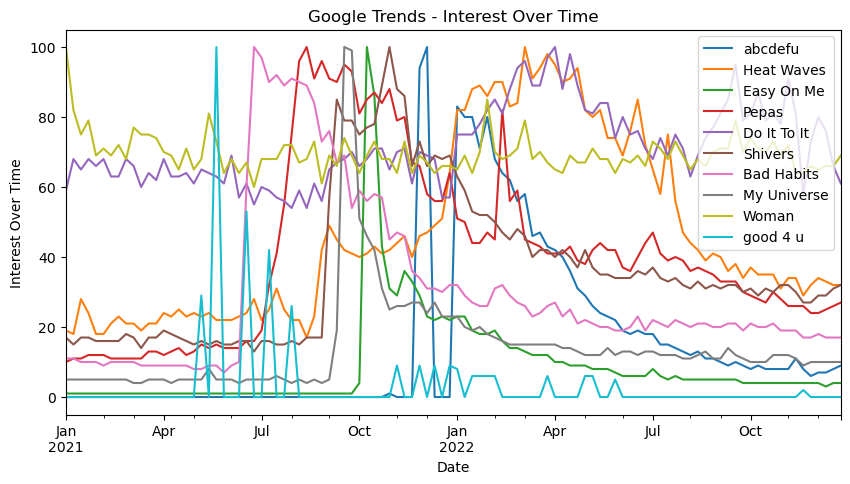

In [ ]:
# use google trend to plot each music's interests over time
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import time
import re

# Create pytrend instance
GET_METHOD='get'

import requests

requests_args = {
    'headers': {
 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'

    }
}

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(requests_args=requests_args)

music_streams = []
name_plot = []
music_names = []
# Build payload for the Google Trends query
music_list = pop_music_name

plt.figure(figsize=(10, 5))

for music in music_list:
    try:
        cleaned_music_name = re.sub(r'[^\w\s]', '', music)
        pytrend.build_payload(kw_list=[music], cat=0, timeframe='2021-01-01 2022-12-31', gprop='')
        df = pytrend.interest_over_time()

        dates = df.index

        # Plot the data using the cleaned music name
        df[cleaned_music_name].plot(label=cleaned_music_name)
        df_subset = df[[cleaned_music_name]]

        # Rename the column to the music term
        df_subset = df_subset.rename(columns={cleaned_music_name: 'Interest'})

        # Add a new column for the music term
        df_subset['Music'] = cleaned_music_name

        # Add the dataframe and dates to the list
        name_plot.append({'Music': cleaned_music_name, 'Dates': dates, 'DataFrame': df_subset})


        # Introduce a delay between requests
        time.sleep(5)

    except Exception as e:
        print(f"Error for {music}: {e}")

plt.title('Google Trends - Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.legend()
plt.show()


In [ ]:
dataframes_list = []

for item in name_plot:
    music_name = item['Music']
    dates = item['Dates']
    df_music = item['DataFrame']

    # Create a new DataFrame with 'Music', 'Dates', and the original columns from df_music
    new_df = pd.DataFrame({
        'Music': [music_name] * len(dates),
        'Dates': dates,
        'Interest': df_music['Interest'],
        # Add other columns from df_music as needed
    })

    dataframes_list.append(new_df)

# Concatenate all the DataFrames in the list into a single DataFrame
music_select = pd.concat(dataframes_list, ignore_index=True)
print(music_select)
# according to music name in the plot, gain the stream
music_stream = result_df[result_df['track_name'].isin(music_select['Music'])][['track_name', 'streams', 'WeekDate']]

music_stream

         Music      Dates  Interest
0      abcdefu 2021-01-03         0
1      abcdefu 2021-01-10         0
2      abcdefu 2021-01-17         0
3      abcdefu 2021-01-24         0
4      abcdefu 2021-01-31         0
...        ...        ...       ...
1035  good 4 u 2022-11-27         0
1036  good 4 u 2022-12-04         0
1037  good 4 u 2022-12-11         0
1038  good 4 u 2022-12-18         0
1039  good 4 u 2022-12-25         0

[1040 rows x 3 columns]


,track_name,streams,WeekDate
1,Heat Waves,6228260,2022-04-07
4,good 4 u,4361310,2022-04-07
10,Woman,3831968,2022-04-07
29,abcdefu,2916251,2022-04-07
30,Shivers,2910860,2022-04-07
...,...,...,...
30624,Shivers,3182222,2022-03-03
30659,Pepas,2394446,2022-03-03
30670,Bad Habits,2277797,2022-03-03
30763,My Universe,1664649,2022-03-03


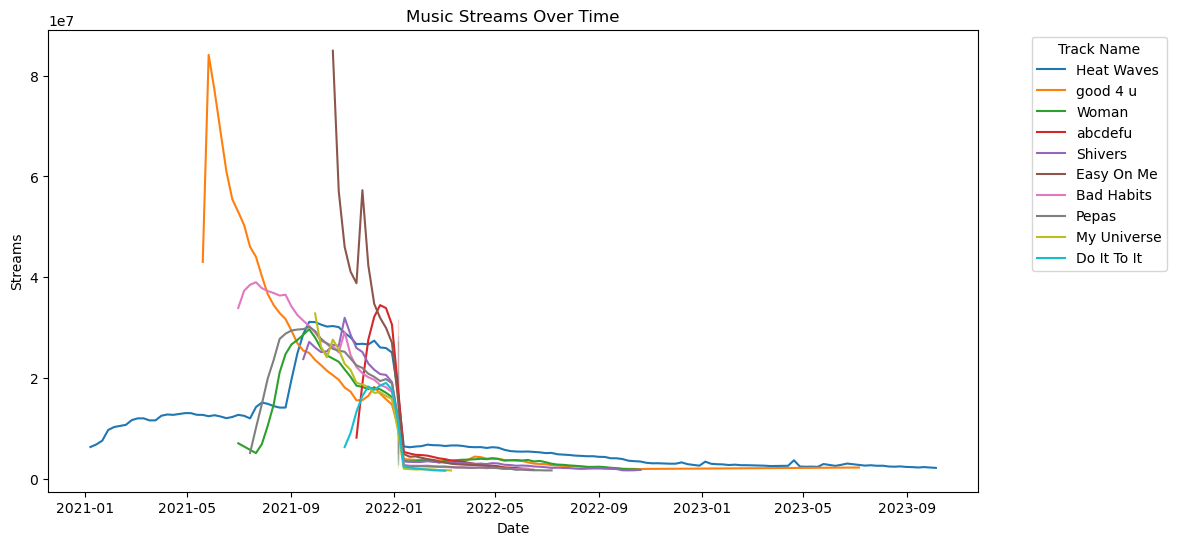

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


music_stream['WeekDate'] = pd.to_datetime(music_stream['WeekDate'])


plt.figure(figsize=(12, 6))
sns.lineplot(x='WeekDate', y='streams', hue='track_name', data=music_stream)
plt.title('Music Streams Over Time')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.legend(title='Track Name', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()


In [ ]:
music_stream = music_stream.sort_values(by = 'WeekDate')

music_name = music_stream['track_name'].unique()

